#**K- NEAREST NEIGHBORS MODEL**

**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

**Importing the dataset**

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
#unique values in each column
df_unique = df.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
df_unique

,Variable,DistinctCount
0,User ID,400
1,Gender,2
2,Age,43
3,EstimatedSalary,117
4,Purchased,2


Dropping the `User ID` column.

In [8]:
df=df.drop(['User ID'], axis=1)

In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Convert gender colum to int format.

Male is 0

Female is 1


In [10]:
df['Gender'] = df['Gender'].map({'Male':0 ,'Female':1})
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


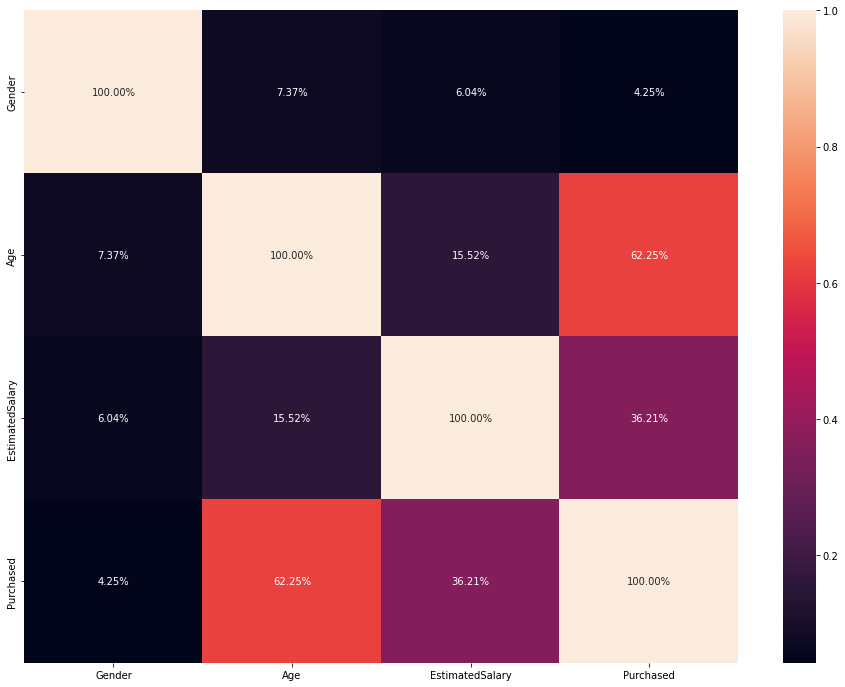

In [11]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True, fmt = '.2%')

**EDA**

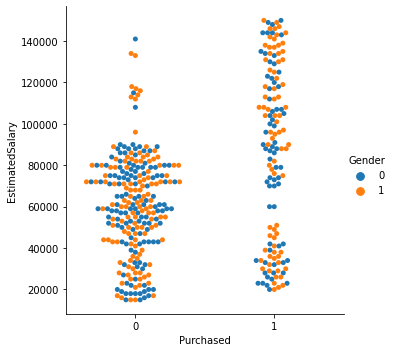

In [12]:

sns.catplot(x="Purchased", y="EstimatedSalary", hue="Gender", kind="swarm", data=df)

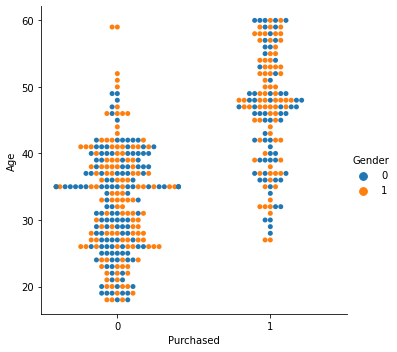

In [13]:
sns.catplot(x="Purchased", y="Age", hue="Gender", kind="swarm", data=df)

From the diagram we can tell that `Purchased` is highly correlated with `Age`. The `Estimatedsalary` has also a good correlation.

Creatting dummy variables for encoding

In [14]:
b = []
for i in df.keys():
  b.append(i)
print(b)

['Gender', 'Age', 'EstimatedSalary', 'Purchased']


In [15]:
df = pd.get_dummies(df, columns = ['Gender'])

In [16]:
b = []
for i in df.keys():
  b.append(i)
print(b)

['Age', 'EstimatedSalary', 'Purchased', 'Gender_0', 'Gender_1']


In [17]:
df

,Age,EstimatedSalary,Purchased,Gender_0,Gender_1
0,19,19000,0,1,0
1,35,20000,0,1,0
2,26,43000,0,0,1
3,27,57000,0,0,1
4,19,76000,0,1,0
...,...,...,...,...,...
395,46,41000,1,0,1
396,51,23000,1,1,0
397,50,20000,1,0,1
398,36,33000,0,1,0


**Fitting K-NN to the Training set**

**Splitting the dataset into the Training set and Test set**

In [18]:
b.remove('Purchased')

In [19]:
b

['Age', 'EstimatedSalary', 'Gender_0', 'Gender_1']

In [20]:
X = df[b].values#array of features
y = df['Purchased'].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Feature Scaling**

In [22]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

**Fitting the kNN model**

In [24]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10))) #predicting using the model

K value  :  1  score :  0.859375
K value  :  2  score :  0.834375
K value  :  3  score :  0.8875
K value  :  4  score :  0.884375
K value  :  5  score :  0.896875
K value  :  6  score :  0.884375
K value  :  7  score :  0.8875
K value  :  8  score :  0.89375
K value  :  9  score :  0.896875
K value  :  10  score :  0.896875
K value  :  20  score :  0.8875
K value  :  50  score :  0.75625


For k=5 we have 89% of accuracy. 

In [25]:
knn = KNeighborsClassifier(5) #it will initialise the model with @neighbours as k 
knn.fit(X_train_scaled, y_train) # train the model
print("Train Accuracy : ", knn.score(X_train_scaled,y_train)) # test the model and it computes the accuracy (train data accuracy)
print("Val Accuracy : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

Train Accuracy :  0.909375
Val Accuracy :  0.896875


**Predicting the Test set results**

In [27]:
results = knn.predict(X_test_scaled)
results

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [28]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': results})
df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,0
77,0,0
78,1,1


**Making the Confusion Matrix**

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,results)

array([[55,  3],
       [ 1, 21]])

**Visualization**

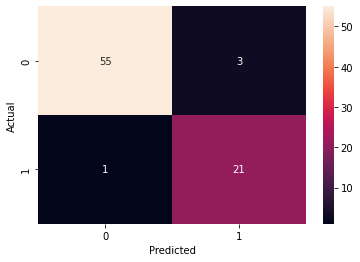

In [31]:
confusion_matrix = pd.crosstab(y_test, results, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)